In [1]:
%load_ext autoreload
%autoreload 2
from data_loader import load_datasets, create_data_loaders
import torch
import os
from cnn_model import Net as init_cnn
import numpy as np
from init_nets import init_resnet, init_efficientnet
import torch.nn.functional as F
from serialization import save, load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

In [2]:
cnn_history_path = "output/history/cnn/cnn"
resnet_history_path = "output/history/resnet/resnet"
efficientnet_history_path = "output/history/efficientnet/efficientnet"

soft_ensemble_history_path = "output/history/ensemble/history_soft.pkl"
hard_ensemble_history_path = "output/history/ensemble/history_hard.pkl"

In [3]:
# picking up results
cnn_results = []
resnet_results = []
efficientnet_results = []

for i in range(1, 6):
    suffix = f"_{i}.pkl"
    cnn_history = load(cnn_history_path + suffix)
    resnet_history = load(resnet_history_path + suffix)
    efficientnet_history = load(efficientnet_history_path + suffix)
    
    cnn_results.append(cnn_history["accuracy_test"])
    resnet_results.append(resnet_history["accuracy_test"])
    efficientnet_results.append(efficientnet_history["accuracy_test"])

soft_ensemble_results = load(soft_ensemble_history_path)
hard_ensemble_results = load(hard_ensemble_history_path)

In [4]:
print(cnn_results)
print(resnet_results)
print(efficientnet_results)
print(soft_ensemble_results)
print(hard_ensemble_results)

[63.66777777777778, 58.66888888888889, 58.56, 64.80777777777777, 59.54666666666667]
[78.88, 80.7388888888889, 75.27, 81.58888888888889, 82.30777777777777]
[88.91666666666667, 88.99888888888889, 88.68777777777778, 89.05555555555556, 89.11555555555556]
[88.24, 88.37666666666667, 87.67555555555555, 87.99, 88.51444444444444]
[84.03222222222222, 85.11, 83.37666666666667, 85.94111111111111, 85.24444444444444]


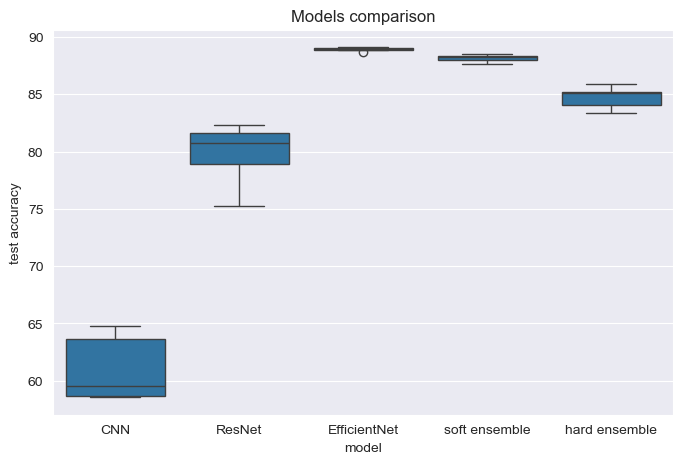

In [5]:
plot_data = []
params = ["CNN", "ResNet", "EfficientNet", "soft ensemble", "hard ensemble"]
total_results = [cnn_results, resnet_results, efficientnet_results, soft_ensemble_results, hard_ensemble_results]
for param, results in zip(params, total_results):
    for res in results:
        plot_data.append({"model": param, "test accuracy": res})

plot_data = pd.DataFrame(plot_data)

plt.figure(figsize=(8, 5))
sns.boxplot(x="model", y="test accuracy", data=plot_data)
plt.title("Models comparison")
plt.show()